# Seminar 2 + Homework 1 / Modeling methods of spatial structure of proteins

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 30.3 MB/s 


In [2]:
import Bio.PDB as pdb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Preparation steps.

Перейдем на <a href="https://projectswhynot.site/pdb-filtering/">эту страничку</a>, откуда получим ID белков для этого семинара.

Заполним поля на этой страничке таким образом:

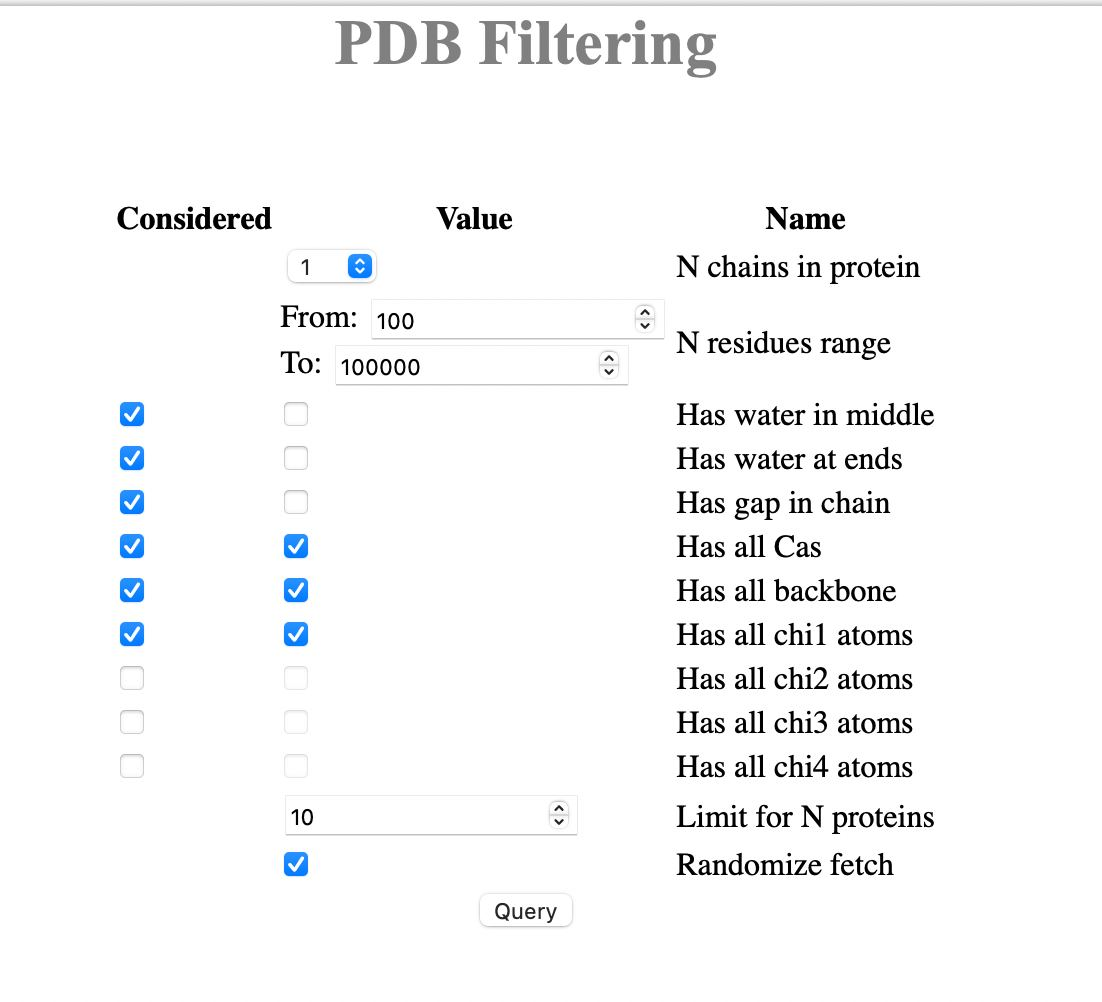

In [3]:
# Загрузим белки
path = "./filtering_results.csv"
data = pd.read_csv(path, sep=";")
data

,pdb_id,model_id,chain_id
0,2EDP,12,A
1,2G0K,6,A
2,2DZM,2,A
3,2KFP,14,A
4,2KGR,2,A
5,2LC0,29,A
6,2K0L,1,A
7,1EXH,13,A
8,2K4Q,8,A
9,1CZ5,4,A


In [ ]:
data.shape[0]

10

In [4]:
chains = []
parser = pdb.PDBParser()
# Парсинг – это процесс сбора данных с последующей их обработкой и анализом.
for i in range(data.shape[0]):
  pdb_id, model_id, _ = data.loc[i] # получаем i строку, где обозначаем "_" то, что нам не надо.
  path = pdb.PDBList().retrieve_pdb_file(pdb_id, file_format="pdb") # получаем файл
  struct = parser.get_structure(pdb_id, path) # получаем структуру
  chain = struct[model_id].child_list[0].child_list # получаем ее как список аминокислот, которые в этой цепочке есть.
  chains += [chain]                         

In [5]:
##
data.loc[0]

pdb_id      2EDP
model_id      12
chain_id       A
Name: 0, dtype: object

In [6]:
##
type(chains)

list

In [ ]:
##
len(chains)

10

In [ ]:
##
chains[0]

[<Residue GLY het=  resseq=1 icode= >,
 <Residue SER het=  resseq=2 icode= >,
 <Residue SER het=  resseq=3 icode= >,
 <Residue GLY het=  resseq=4 icode= >,
 <Residue SER het=  resseq=5 icode= >,
 <Residue SER het=  resseq=6 icode= >,
 <Residue GLY het=  resseq=7 icode= >,
 <Residue GLY het=  resseq=8 icode= >,
 <Residue SER het=  resseq=9 icode= >,
 <Residue PHE het=  resseq=10 icode= >,
 <Residue GLN het=  resseq=11 icode= >,
 <Residue TYR het=  resseq=12 icode= >,
 <Residue VAL het=  resseq=13 icode= >,
 <Residue PRO het=  resseq=14 icode= >,
 <Residue VAL het=  resseq=15 icode= >,
 <Residue GLN het=  resseq=16 icode= >,
 <Residue LEU het=  resseq=17 icode= >,
 <Residue GLN het=  resseq=18 icode= >,
 <Residue GLY het=  resseq=19 icode= >,
 <Residue GLY het=  resseq=20 icode= >,
 <Residue ALA het=  resseq=21 icode= >,
 <Residue PRO het=  resseq=22 icode= >,
 <Residue TRP het=  resseq=23 icode= >,
 <Residue GLY het=  resseq=24 icode= >,
 <Residue PHE het=  resseq=25 icode= >,
 <Residue

In [ ]:
##
chains[1]

[<Residue ALA het=  resseq=1 icode= >,
 <Residue ALA het=  resseq=2 icode= >,
 <Residue PRO het=  resseq=3 icode= >,
 <Residue THR het=  resseq=4 icode= >,
 <Residue ALA het=  resseq=5 icode= >,
 <Residue THR het=  resseq=6 icode= >,
 <Residue VAL het=  resseq=7 icode= >,
 <Residue THR het=  resseq=8 icode= >,
 <Residue PRO het=  resseq=9 icode= >,
 <Residue SER het=  resseq=10 icode= >,
 <Residue SER het=  resseq=11 icode= >,
 <Residue GLY het=  resseq=12 icode= >,
 <Residue LEU het=  resseq=13 icode= >,
 <Residue SER het=  resseq=14 icode= >,
 <Residue ASP het=  resseq=15 icode= >,
 <Residue GLY het=  resseq=16 icode= >,
 <Residue THR het=  resseq=17 icode= >,
 <Residue VAL het=  resseq=18 icode= >,
 <Residue VAL het=  resseq=19 icode= >,
 <Residue LYS het=  resseq=20 icode= >,
 <Residue VAL het=  resseq=21 icode= >,
 <Residue ALA het=  resseq=22 icode= >,
 <Residue GLY het=  resseq=23 icode= >,
 <Residue ALA het=  resseq=24 icode= >,
 <Residue GLY het=  resseq=25 icode= >,
 <Residue

## Part one. Seminar.

Задание 1.1. Соберите и выведите на гистограмме значения угла $\omega = \angle(C_\alpha^{i-1}, C^{i-1}, N^{i}, C_\alpha^{i})$. 


Почему он не рассматривается при предсказании геометрии?

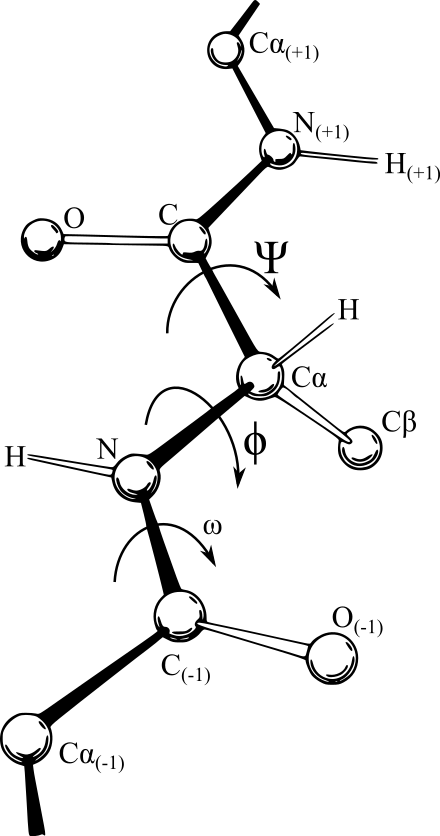

In [7]:
omegas = []

for chain in chains:
  for i in range(1, len(chain)): # n amino acids -> n-1 w angles
    omega = pdb.calc_dihedral(chain[i-1]["CA"].get_vector(),
                              chain[i-1]["C"].get_vector(),
                              chain[i]["N"].get_vector(),
                              chain[i]["CA"].get_vector())
    omegas += [omega]

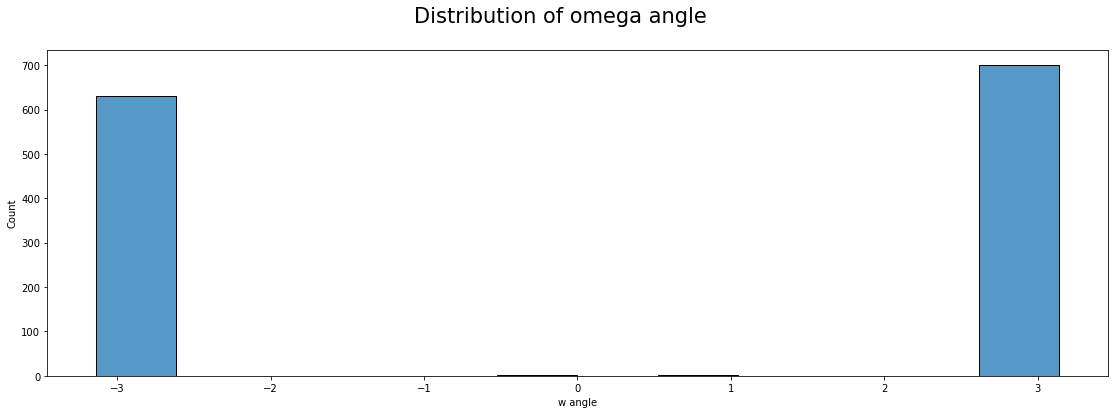

In [8]:
fig,axes = plt.subplots(figsize=(19,6))
fig.suptitle("Distribution of omega angle", fontsize=21)
sns.histplot(omegas)
axes.set_xlabel("w angle", fontsize=10)
plt.show()

# -3 and 3 is the same result (as a circle w pi and -pi).

In [ ]:
##
len(chains)

10

In [ ]:
##
len(chains[0])

100

R ("Почему он не рассматривается при предсказании геометрии?"): ω angles are 180° for majority proteins
(more inf. here: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-021-04525-6).

Задание 1.2. Выведите отдельно гистограммы значений углов $\phi, \psi$.

In [9]:
# phi, psi angles are counted for such aa that have both psi, phi (so, we don't take the 1 and the last aa)
phis = []
psis = []

for chain in chains:
  for i in range(1, len(chain)-1):
    phi = pdb.calc_dihedral(chain[i-1]["C"].get_vector(),
                              chain[i]["N"].get_vector(),
                              chain[i]["CA"].get_vector(),
                              chain[i]["C"].get_vector())
    psi = pdb.calc_dihedral(chain[i]["N"].get_vector(),
                              chain[i]["CA"].get_vector(),
                              chain[i]["C"].get_vector(),
                              chain[i+1]["N"].get_vector())
    phis += [phi]
    psis += [psi]

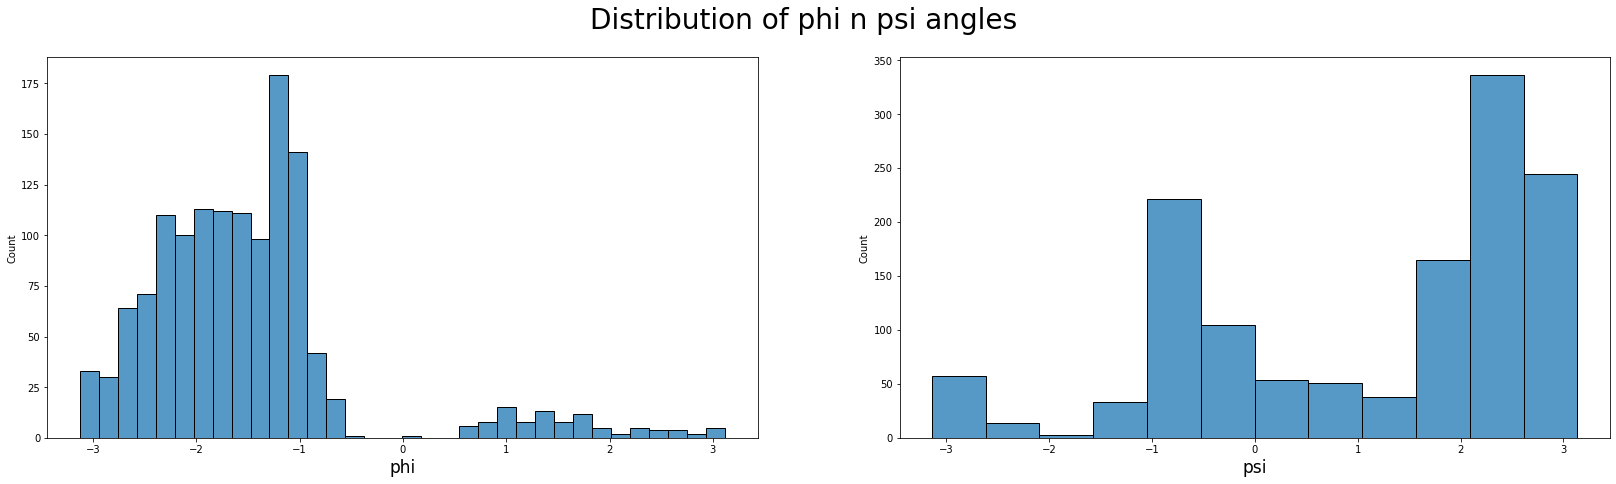

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(28, 7))
fig.suptitle("Distribution of phi n psi angles", fontsize=28)
sns.histplot(phis, ax=axes[0])
axes[0].set_xlabel("phi",fontsize=17)
sns.histplot(psis, ax=axes[1])
axes[1].set_xlabel("psi",fontsize=17)
plt.show()

Задание 1.3. Постройте карту Рамачандрана для собранных значений. 


Соотносится ли она с тем, что было рассказано на лекции?

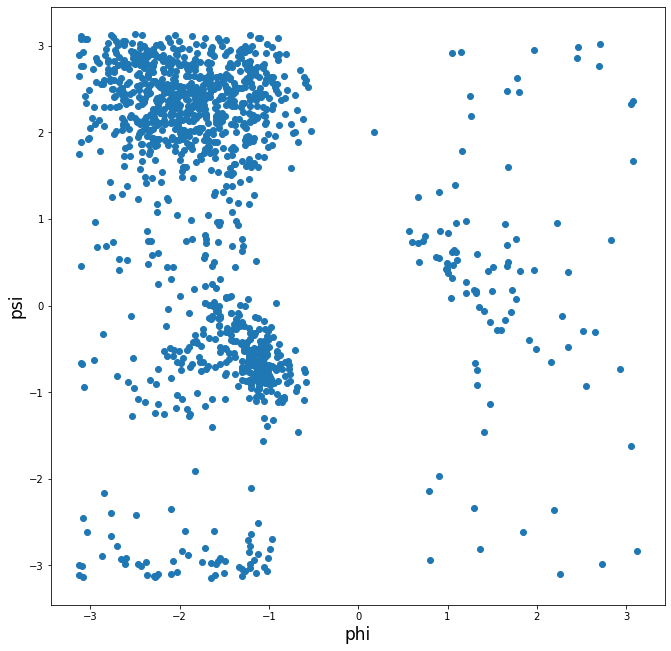

In [11]:
fig,ax = plt.subplots(figsize=(11,11))
plt.scatter(phis, psis) # x = phi, y = psi
ax.set_xlabel("phi",fontsize=17)
ax.set_ylabel("psi",fontsize=17)
plt.show()

R ("Соотносится ли она с тем, что было рассказано на лекции?"): Да, соотносится. Например, это можно увидеть по картинке:

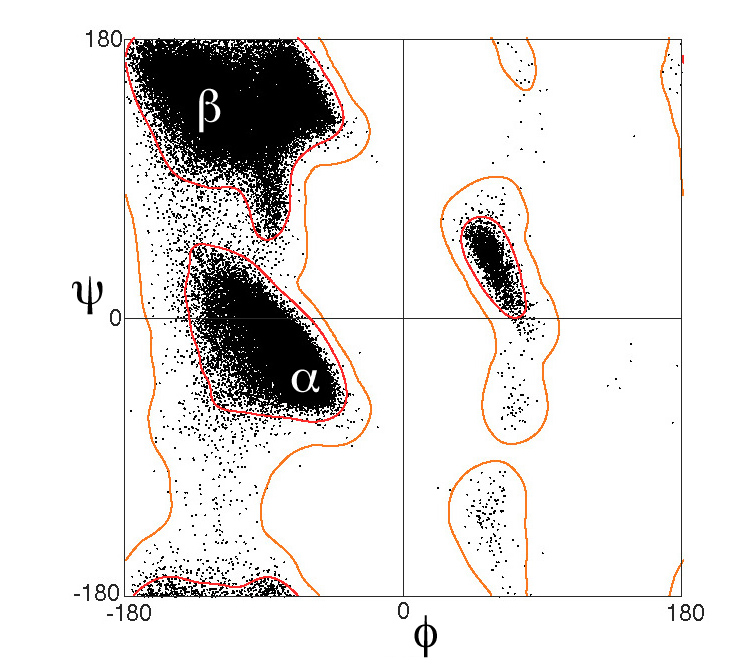

Изображение получено с сайта https://commons.wikimedia.org/wiki/File:Ramachandran_plot_general_100K.jpg.

## Part two. Homework.

Допустим, у нас есть основной каркас (все атомы $N,C_\alpha, C$). **Давайте восстановим координаты атома $C_\beta$.** Для этого нам нужно значение двугранного угла $\angle(C^{i-1}, N^{i}, C_\alpha^{i}, C_\beta^{i})$, значение планарного угла $\angle(N^{i}, C_\alpha^{i}, C_\beta^{i})$ и длина связи $C_\alpha-C_\beta$.

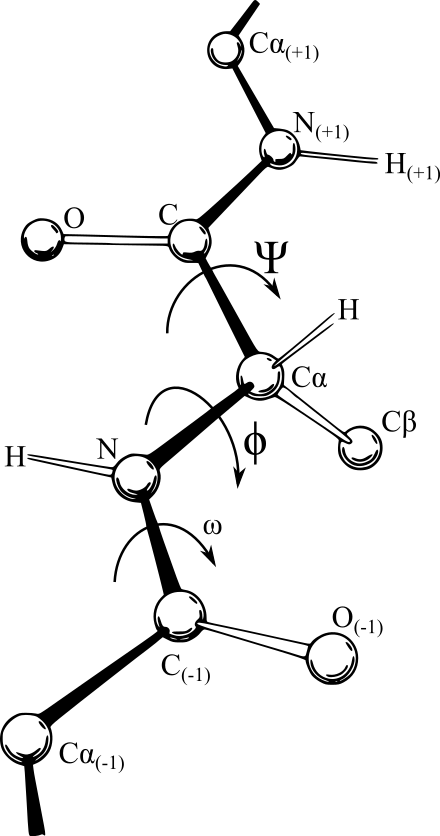

Задание 2.1.1. Соберите и выведите на гистограмме значения двугранного угла $\angle(C^{i-1}, N^{i}, C_\alpha^{i}, C_\beta^{i})$. 

**Комментарий:** обратите внимание, у GLY нет атома $C_\beta$!
_______
Можно ли визуально заметить зависимость с углами $\phi, \psi?$

In [12]:
angles_1 = []

for chain in chains:
  for i in range(1, len(chain)):
    ang_1 = pdb.calc_dihedral(chain[i-1]["C"].get_vector(),
                              chain[i]["N"].get_vector(),
                              chain[i]["CA"].get_vector(),
                              chain[i]["CB"].get_vector())
    angles_1 += [ang]

# we have an error because GLY aa doesn't contain CB atom.

NameError: name 'ang' is not defined

In [13]:
angles_1 = []

for chain in chains:
  for i in range(1, len(chain)):
    if chain[i].resname == "GLY":
      continue
    ang_1 = pdb.calc_dihedral(chain[i-1]["C"].get_vector(),
                              chain[i]["N"].get_vector(),
                              chain[i]["CA"].get_vector(),
                              chain[i]["CB"].get_vector())
    angles_1 += [ang_1]

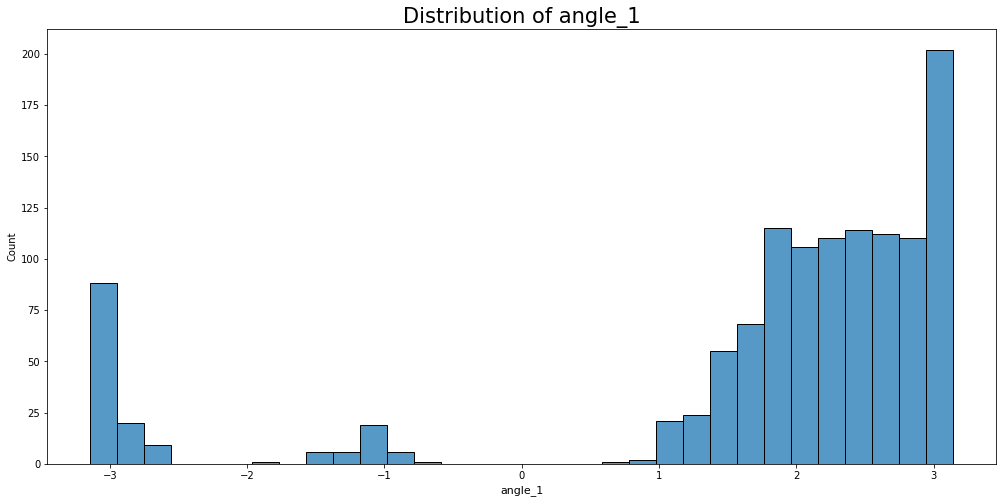

In [14]:
fig,ax = plt.subplots(figsize=(17,8))
sns.histplot(angles_1, ax=ax)
ax.set_title("Distribution of angle_1", fontsize=21)
ax.set_xlabel("angle_1",fontsize=11)
plt.show()

R ("Можно ли визуально заметить зависимость с углами $\phi, \psi?$"): По моему мнению, зависимости точно нет между psi и angle_1; а вот phi и angle_1 как будто бы смещены на 2$π$ между собой:

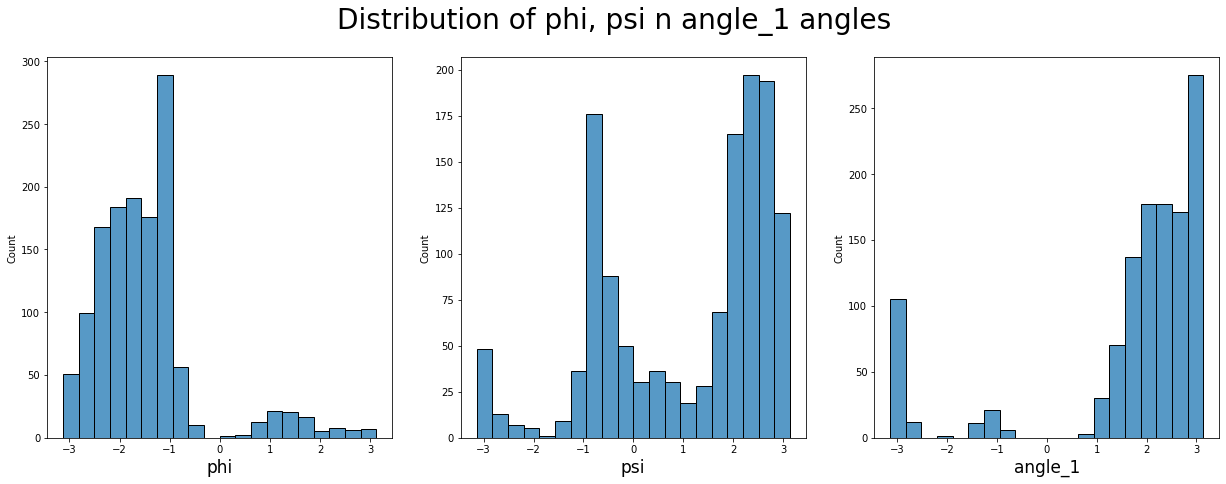

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle("Distribution of phi, psi n angle_1 angles", fontsize=28)
sns.histplot(phis, ax=axes[0], bins=20)
axes[0].set_xlabel("phi",fontsize=17)
sns.histplot(psis, ax=axes[1], bins=20)
axes[1].set_xlabel("psi",fontsize=17)
sns.histplot(angles_1, ax=axes[2], bins=20)
axes[2].set_xlabel("angle_1",fontsize=17)
plt.show()

Задание 2.1.2. Выведите на одном графике значения $\phi$ и $\angle(C^{i-1}, N^{i}, C_\alpha^{i}, C_\beta^{i})$. Восстановите зависимость любым способом.

**Комментарий**: восстановить зависимость = сделать функцию вида **ang_value(phi_value)**

In [16]:
phis = []

for chain in chains:
  for i in range(1, len(chain)):
    if chain[i].resname == "GLY":
      continue
    phi = pdb.calc_dihedral(chain[i-1]["C"].get_vector(),
                              chain[i]["N"].get_vector(),
                              chain[i]["CA"].get_vector(),
                              chain[i]["C"].get_vector())
    phis += [phi]

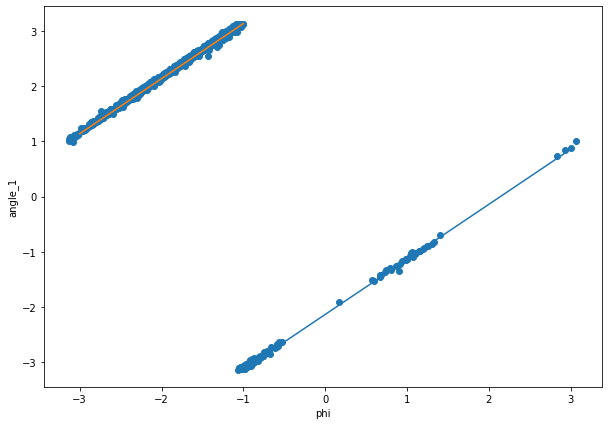

In [17]:
fig,ax = plt.subplots(figsize=(10,7))
plt.scatter(phis,angles_1) # x - phi, y - angle_1
ax.set_xlabel("phi")
ax.set_ylabel("angle_1")
plt.plot(range(-1, 4), [i-np.pi+1 for i in range(-1, 4)])
plt.plot(range(-3, 0), [i+np.pi+1 for i in range(-3, 0)])
plt.show()

In [18]:
# Допустим, на вход мы подаем угол в радианах (в градусах от -180 до 180), т.е. от -3,14 до 3,14.
# p.s. the phi angle's range is from -180 to 180 degrees.

new_phis = []
new_angles_1 = []

def ang_value(phi_value):
  if phi_value < -1 and phi_value >= -np.pi:
    ang_value = phi_value + np.pi + 1
  elif phi_value >= -1 and phi_value <= np.pi:
    ang_value = phi_value - np.pi + 1
  return ang_value

for i in np.arange(-3.14, 3.14, 0.05):
  new_phis += [i]
  new_angles_1 += [ang_value(i)]

In [19]:
##
print(new_phis)
print(new_angles_1)

[-3.14, -3.0900000000000003, -3.0400000000000005, -2.9900000000000007, -2.940000000000001, -2.890000000000001, -2.840000000000001, -2.7900000000000014, -2.7400000000000015, -2.6900000000000017, -2.640000000000002, -2.590000000000002, -2.5400000000000023, -2.4900000000000024, -2.4400000000000026, -2.390000000000003, -2.340000000000003, -2.290000000000003, -2.2400000000000033, -2.1900000000000035, -2.1400000000000037, -2.090000000000004, -2.040000000000004, -1.9900000000000042, -1.9400000000000044, -1.8900000000000046, -1.8400000000000047, -1.790000000000005, -1.740000000000005, -1.6900000000000053, -1.6400000000000055, -1.5900000000000056, -1.5400000000000058, -1.490000000000006, -1.4400000000000062, -1.3900000000000063, -1.3400000000000065, -1.2900000000000067, -1.2400000000000069, -1.190000000000007, -1.1400000000000072, -1.0900000000000074, -1.0400000000000076, -0.9900000000000078, -0.9400000000000079, -0.8900000000000081, -0.8400000000000083, -0.7900000000000085, -0.7400000000000087

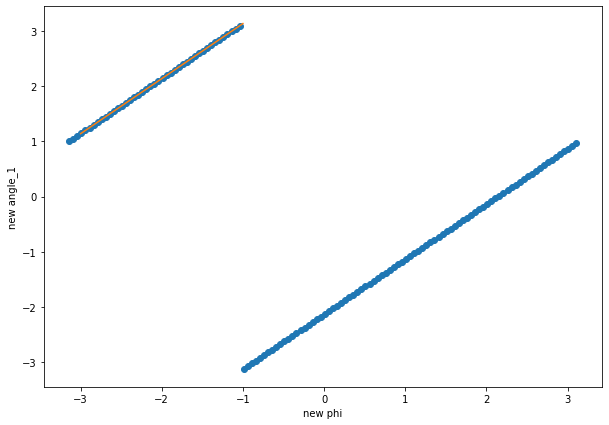

In [20]:
fig,ax = plt.subplots(figsize=(10,7))
plt.scatter(new_phis,new_angles_1)
ax.set_xlabel("new phi")
ax.set_ylabel("new angle_1")
plt.plot(range(-1, 4), [i-np.pi+1 for i in range(-1, 4)])
plt.plot(range(-3, 0), [i+np.pi+1 for i in range(-3, 0)])
plt.show()

Задание 2.2. Соберите и выведите на гистограмме значения планарного угла $\angle(N^{i}, C_\alpha^{i}, C_\beta^{i})$.

Нужно ли здесь искать зависимость с другими углами или можно просто выбрать какое-то одно значение?

In [21]:
angles_2 = []

for chain in chains:
  for i in range(1, len(chain)):
    if chain[i].resname == "GLY":
      continue
    ang_2 = pdb.calc_angle(chain[i]["N"].get_vector(),
                           chain[i]["CA"].get_vector(),
                           chain[i]["CB"].get_vector())
    angles_2 += [ang_2]

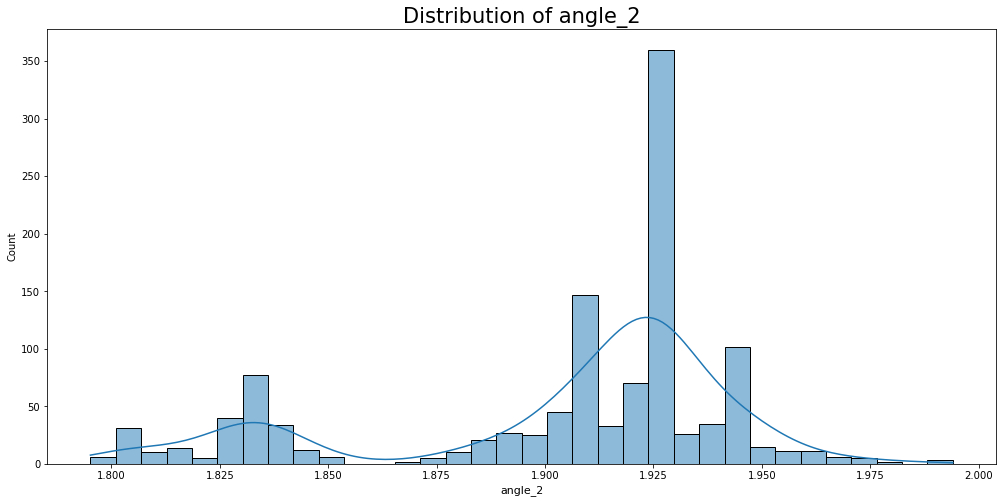

In [22]:
fig,ax = plt.subplots(figsize=(17,8))
sns.histplot(angles_2, ax=ax, kde=True)
ax.set_title("Distribution of angle_2", fontsize=21)
ax.set_xlabel("angle_2",fontsize=11)
plt.show()

R ("Нужно ли здесь искать зависимость с другими углами или можно просто выбрать какое-то одно значение?"): Думаю, можно просто выбрать среднее значение (=1,925), т.к. это очень похоже на нормальное распределение с выбросами (как на рисунке ниже).

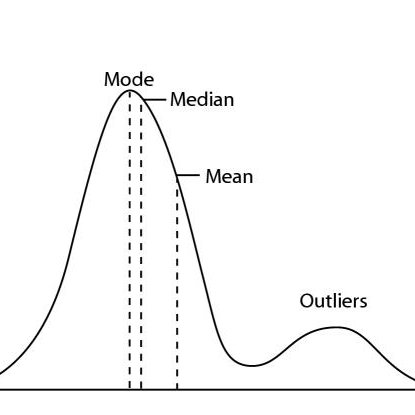

In [51]:
# поэтому
new_angles_2 = 1.925
new_angles_2 = np.full(len(angles_2), new_angles_2)

Задание 2.3. Проведите аналогичное исследование для длины связи $C_\alpha-C_\beta$.

In [23]:
dists = []

for chain in chains:
  for i in range(1, len(chain)):
    if chain[i].resname == "GLY":
      continue
    ca = chain[i]["CA"]
    cb = chain[i]["CB"]
    dists += [ca-cb]

In [24]:
dists[0]

1.5298803

In [25]:
# second way to find the bond length:
dists = []

for chain in chains:
  for i in range(1, len(chain)):
    if chain[i].resname == "GLY":
      continue
    ca = chain[i]["CA"]
    cb = chain[i]["CB"]
    d = np.linalg.norm(ca-cb)
    dists += [d]

In [26]:
dists[0]

1.5298803

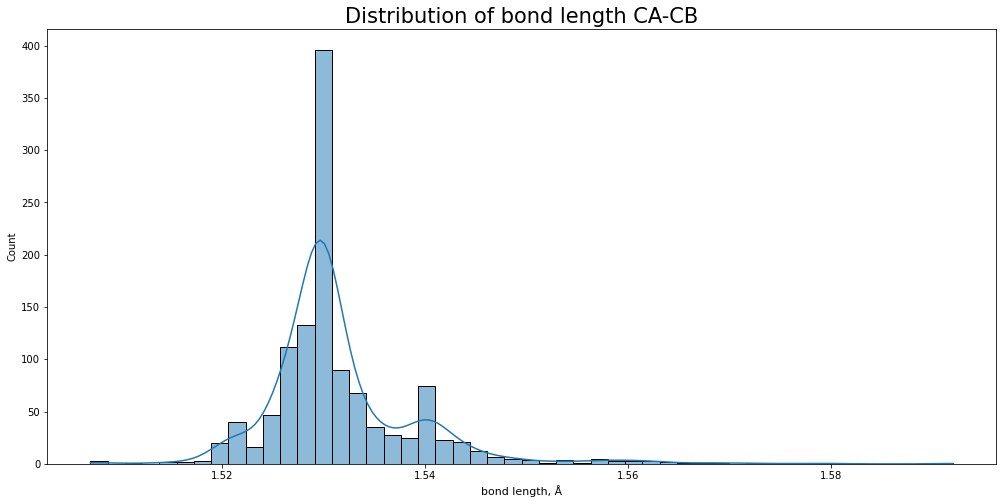

In [27]:
fig,ax = plt.subplots(figsize=(17,8))
sns.histplot(dists, ax=ax, kde = True, bins = 50)
ax.set_title("Distribution of bond length CA-CB", fontsize=21)
ax.set_xlabel("bond length, Å",fontsize=11) # angstrom (10^-10 metre)
plt.show()

R ("Проведите аналогичное исследование для длины связи  𝐶𝛼−𝐶𝛽, i.e., нужно ли здесь искать зависимость с другими углами или можно просто выбрать какое-то одно значение?"): Думаю, здесь тоже можно просто выбрать среднее значение (=~1,53), т.к. это также очень похоже на нормальное распределение с выбросами.

In [55]:
# поэтому
new_dists = 1.53
new_dists = np.full(len(dists), new_dists)

Задание 3. Теперь у нас все готово для восстановления атомов $C_\beta$. Загрузите <a href=https://disk.yandex.ru/d/QFymCllkjVpKTg>отсюда</a> подготовленный файл; поместите его в папку с ноутбуком и импортируйте все функции из него:

In [28]:
from geometry import *

Используйте функцию place_next_dihedral_atom, чтобы получить координаты следующего атома ($D$) в четверке двугранного угла $A,B,C,D$. Интерфейс запуска:
place_next_dihedral_atom(previous_3_atoms, dihedral_angle_val, planar_angle_val, distance), где:

- previous_3_atoms - np.array размера 3x3, где на каждой строчке записаны координаты соответствующего атома ($A,B,C$);
- dihedral_angle_val - значение двугранного угла $\angle (A-B-C-D)$ (в радианах);
- planar_angle_val - значение планарного угла $\angle (B-C-D)$ (в радианах);
- distance - расстояние $C-D$ (в ангстремах).

Пример запуска:

In [29]:
prev_coords = np.array([[0,0,0],
                        [1,0,0],
                        [2,1,0]])
dih_ang_val = np.pi/2
planar_ang_val = np.pi * 3/4
dist = 3
next_at = place_next_dihedral_atom(prev_coords, dih_ang_val, planar_ang_val, dist)
print("Атом D:", next_at)

Атом D: [3.5        2.5        2.12132034]


**Проверка:**

In [30]:
final_dih_ang = pdb.calc_dihedral(pdb.Vector(prev_coords[0]),
                                  pdb.Vector(prev_coords[1]),
                                  pdb.Vector(prev_coords[2]),
                                  pdb.Vector(next_at)
                                 )
print("Получился двугранный угол: {}, а должен быть: {}".format(final_dih_ang, dih_ang_val))

Получился двугранный угол: 1.5707963267948966, а должен быть: 1.5707963267948966


In [ ]:
final_plan_ang = pdb.calc_angle(pdb.Vector(prev_coords[1]),
                                pdb.Vector(prev_coords[2]),
                                pdb.Vector(next_at)
                                 )
print("Получился планарный угол: {}, а должен быть: {}".format(final_plan_ang, planar_ang_val))

Получился планарный угол: 2.3561944901923453, а должен быть: 2.356194490192345


In [ ]:
final_bond_len = np.linalg.norm(next_at - prev_coords[2])
print("Получилась длина связи: {}, а должна быть: {}".format(final_bond_len, dist))

Получилась длина связи: 3.0000000000000004, а должна быть: 3


С помощью функции place_next_dihedral_atom предскажите координаты всех $C_\beta$ в тестовом белке с индексом 0. В отдельную переменную сохраните все настоящие координаты $C_\beta$ из белка.

**Напоминание:** У GLY нет $C_\beta$.

In [31]:
## Тестовый белок 
print(chains[0][:10]) # белок с индексом 0
print(len(chains[0])) # .. содержит 100 aa

[<Residue GLY het=  resseq=1 icode= >, <Residue SER het=  resseq=2 icode= >, <Residue SER het=  resseq=3 icode= >, <Residue GLY het=  resseq=4 icode= >, <Residue SER het=  resseq=5 icode= >, <Residue SER het=  resseq=6 icode= >, <Residue GLY het=  resseq=7 icode= >, <Residue GLY het=  resseq=8 icode= >, <Residue SER het=  resseq=9 icode= >, <Residue PHE het=  resseq=10 icode= >]
100


In [32]:
coords = []

for chain in chains:
  for i in range(1, len(chain)):
    if chain[i].resname == "GLY":
      continue
    coords.append(np.array([chain[i-1]["C"].get_coord(),
                            chain[i]["N"].get_coord(),
                            chain[i]["CA"].get_coord()]))

In [33]:
cb_orig = [] # variable w/ original coordinate values

for chain in chains:
  for i in range(1, len(chain)):
    if chain[i].resname == "GLY":
      continue
    cb_orig.append(chain[i]["CB"].get_coord())

In [56]:
cb_pred = [] # variable w/ predicted coordinate values

for prev_coords, dih_ang_val, planar_ang_val, dist in zip(coords, new_angles_1, new_angles_2, new_dists):
    next_at = place_next_dihedral_atom(prev_coords, dih_ang_val, planar_ang_val, dist)
    cb_pred.append(next_at)

In [57]:
cb_pred = cb_pred[:100] # поскольку тестовый белок содержит 100 аминокислот

In [58]:
# Предсказанные координаты всех С𝛽 в тестовом белке с индексом 0:
for i in cb_pred:
  print("Координаты C𝛽:", i)

Координаты C𝛽: [-28.48553287 -20.08488219  -0.27202091]
Координаты C𝛽: [-29.78852748 -14.64287861  -1.1860339 ]
Координаты C𝛽: [-22.1939607  -17.43102578  -4.33773757]
Координаты C𝛽: [-21.95179466 -12.24881996  -6.74500868]
Координаты C𝛽: [-13.66629517 -10.08171311  -9.40439742]
Координаты C𝛽: [-9.9162758  -8.10851435 -5.75633429]
Координаты C𝛽: [-12.31319911  -3.40049528  -7.80978179]
Координаты C𝛽: [-6.66339961 -2.58986491 -8.09989509]
Координаты C𝛽: [-9.24650701  2.08585751 -5.85069094]
Координаты C𝛽: [-4.12365115  3.11170618 -8.61374969]
Координаты C𝛽: [-5.11599877  6.34023823 -4.13589487]
Координаты C𝛽: [-2.53139887  9.16448092 -8.41008255]
Координаты C𝛽: [-0.99843182 11.06233427 -3.02306667]
Координаты C𝛽: [-0.90810721 16.06483278 -5.29956722]
Координаты C𝛽: [ 6.12622722 11.65505393  0.37716041]
Координаты C𝛽: [ 8.24971605 11.44411842  3.20330728]
Координаты C𝛽: [ 3.40465856 10.9148635   0.37125063]
Координаты C𝛽: [2.12726604 5.02967546 2.50692579]
Координаты C𝛽: [5.21783482 1.83

А теперь давайте посмотрим на точность такого восстановления геометрии. Пусть переменная с предсказанными координатами называется $cb\_pred$, с оригинальными - $cb\_orig$.

In [37]:
from Bio.PDB.QCPSuperimposer import QCPSuperimposer
# Superimposition (или наложение) - это размещение одной вещи над другой так, чтобы обе они все еще были очевидны.
# Quaternion Characteristic Polynomial (QCP) is a method to calculate RMSD and rotation matrix for superpositioning.
# Root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values ..
# ..predicted by a model and the values observed.
# Rotation matrix - is a type of transformation matrix. The purpose of this matrix is to perform the rotation of vectors in Euclidean space.
# Transformation matrix is a matrix that transforms one vector into another vector by the process of matrix multiplication.

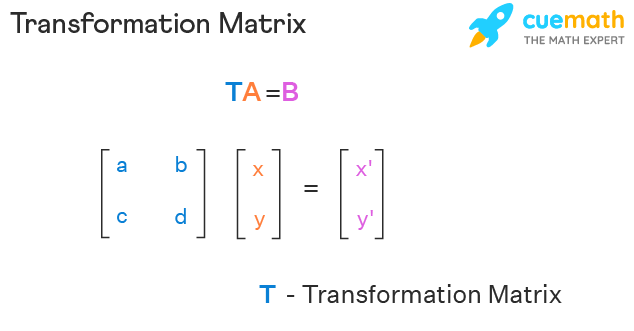

In [59]:
cb_orig = cb_orig[:100]

In [60]:
imposer = QCPSuperimposer()
imposer.set(np.array(cb_orig), np.array(cb_pred))
imposer.run()
rms = imposer.get_rms() # rms error (rmse)
print("Точность восстановленных CB = {} ангстрем.".format(rms))

Точность восстановленных CB = 1.8842278112442294 ангстрем.
